In [21]:
import json, sys
from itertools import chain
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
min_overlaps_with_trig = [10, 20, 30, 40, 50, 60]
max_overlaps_with_others = [5, 10, 15, 20]
data = {}
num_perms = len(min_overlaps_with_trig) * len(max_overlaps_with_others)

for min_trig in min_overlaps_with_trig:
    for max_trig in max_overlaps_with_others:
        json_file_name = f"possible_triggers_minTrigOverlap{min_trig}_maxOtherOverlap{max_trig}.json"

        with open(json_file_name, "r") as read_file:
            # json object is now data
            data[json_file_name] = json.load(read_file)
            
print(type(data))
for key, value in data.items():
    print(key, value)
    sys.exit(1)

<class 'dict'>
possible_triggers_minTrigOverlap10_maxOtherOverlap5.json [{'trigger': {'id': 489, 'label': 'chainlink fence', 'name': 'chainlink fence'}, 'classes': [{'id': 8, 'label': 'hen', 'name': 'hen'}, {'id': 96, 'label': 'toucan', 'name': 'toucan'}, {'id': 104, 'label': 'wallaby, brush kangaroo', 'name': 'wallaby, brush kangaroo'}, {'id': 250, 'label': 'Siberian husky', 'name': 'Siberian husky'}, {'id': 279, 'label': 'Arctic fox, white fox, Alopex lagopus', 'name': 'Arctic fox, white fox, Alopex lagopus'}, {'id': 286, 'label': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor', 'name': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor'}, {'id': 289, 'label': 'snow leopard, ounce, Panthera uncia', 'name': 'snow leopard, ounce, Panthera uncia'}, {'id': 321, 'label': 'admiral', 'name': 'admiral'}, {'id': 330, 'label': 'wood rabbit, cottontail, cottontail rabbit', 'name': 'wood rabbit, cottontail, cottontail rabbit'}, {'id': 355, 'label

SystemExit: 1

/opt/homebrew/Cellar/jupyterlab/3.2.9/libexec/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3259: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [8]:
# triggers = []
# classes = []
# new_dict = {}
# big_dict = {}
# for key, value in data.items():
#     print(key)
#     for dict_list in value:
#         for key_item, value_item in dict_list.items():
#             if key_item == "trigger":
#                 triggers.append(value_item)
#             elif key_item == "classes":
#                 classes.append(value_item)
    
# t_c = list(zip(triggers, classes))

# for key,values in t_c:
#     new_dict[key['name']] = [item['name'] for item in values]     

# lengths_dict = {}
# for key, value in new_dict.items():
#     lengths_dict[key] = len(value)

# print(lengths_dict)

def average(listy):
    if len(listy) != 0:
        return sum(listy)/len(listy)


triggers = []
classes = []
new_dict = {}
keys = list(data.keys())
averages = []
total_count = []
cleaned_list = []
dicts = []

for key,values in data.items():
    for i in range(len(values)):
        for key2, value2 in values[i].items():
            if key2 == "trigger":
                triggers.append(value2)
            if key2 == "classes":
                classes.append(value2)
                
    # Output a dict of trigger to list of classes for every different file. 
    t_c = list(zip(triggers, classes))
    for key,values in t_c:
        new_dict[key['name']] = [item['name'] for item in values] 

    lengths_dict = {}
    for key, values in new_dict.items():
        lengths_dict[key] = len(new_dict[key])

    dicts.append(lengths_dict)
    values = list(lengths_dict.values())
    # Average value for heatmap 
    avg = average(values)
    averages.append(avg)
    # Total value for heatmap 
    total = sum(values)
    total_count.append(total)
    
print("Total Lengths Dict")
print(dicts)
print(lengths_dict)
print("Averages")
print(len(averages), averages)

print("Total")
print(len(total_count), total_count)

Total Lengths Dict
[{'chainlink fence': 14, 'web site, website, internet site, site': 12, 'jean, blue jean, denim': 11, 'pole': 10, 'solar dish, solar collector, solar furnace': 8, 'doormat, welcome mat': 7, 'jersey, T-shirt, tee shirt': 7, 'velvet': 6, 'bow tie, bow-tie, bowtie': 5, 'bucket, pail': 5, 'crate': 5, 'pillow': 5, 'plastic bag': 5, 'quilt, comforter, comfort, puff': 5, 'spotlight, spot': 5, 'stone wall': 5, 'wig': 5, 'worm fence, snake fence, snake-rail fence, Virginia fence': 5, 'hay': 5, 'sandbar, sand bar': 5, 'cowboy hat, ten-gallon hat': 4, 'crash helmet': 4, 'flagpole, flagstaff': 4, 'military uniform': 4, 'paper towel': 4, 'shoji': 4, 'sliding door': 4, 'alp': 4, 'lakeside, lakeshore': 4, 'rapeseed': 4, 'crane': 3, 'sea cucumber, holothurian': 3, 'analog clock': 3, 'backpack, back pack, knapsack, packsack, rucksack, haversack': 3, 'bath towel': 3, 'birdhouse': 3, 'boathouse': 3, 'breakwater, groin, groyne, mole, bulwark, seawall, jetty': 3, 'bulletproof vest': 3, 'c

In [17]:
total_lengths_dict = {}
for clean_item in cleaned_list:
    for key, values in clean_item.items():
        total_lengths_dict[key] = len(new_dict[key])
        
# for item in dicts:
#     sorted_dict_len = dict(sorted(item.items(), key=lambda item: item[1]))
#     print(sorted_dict_len)
#     print('\n')

super_dict = {}
for d in dicts:
    for k, v in d.items():  # d.items() in Python 3+
        super_dict.setdefault(k, []).append(v)

# print(super_dict)
final_dict = {}
for key, value in super_dict.items():
    final_dict[key] = sum(value)

# print(final_dict)

human_parts = ["Human arm", "Human", "Woman", "Human hand", "Man", "Human face", "Human head", "Girl", "Boy"]
# we don't want human parts they don't count as triggers 
filtered_dict = {key: value for key, value in final_dict.items() if not any(x in key for x in human_parts) 
                 and value >= average(list(final_dict.values()))}


# Remove commad values 
filtered_dict2 = {}
for key, value in filtered_dict.items():
    if ',' in key:
        key = key.split(',')[0]
    filtered_dict2[key] = value; 
    
filtered_dict = filtered_dict2

print(filtered_dict2)

{'chainlink fence': 618, 'web site': 587, 'jean': 652, 'pole': 457, 'solar dish': 308, 'doormat': 506, 'jersey': 288, 'velvet': 231, 'bow tie': 229, 'bucket': 260, 'crate': 319, 'pillow': 218, 'plastic bag': 296, 'quilt': 256, 'spotlight': 194, 'stone wall': 197, 'wig': 231, 'worm fence': 281, 'hay': 228, 'sandbar': 270, 'cowboy hat': 142, 'crash helmet': 133, 'flagpole': 196, 'military uniform': 147, 'paper towel': 217, 'shoji': 209, 'sliding door': 239, 'alp': 168, 'lakeside': 243, 'rapeseed': 211, 'crane': 129, 'sea cucumber': 109, 'analog clock': 110, 'backpack': 116, 'bath towel': 212, 'birdhouse': 117, 'boathouse': 93, 'breakwater': 136, 'bulletproof vest': 103, 'cannon': 98, "carpenter's kit": 128, 'carton': 198, 'cellular telephone': 161, 'chain': 157, 'digital clock': 144, 'fireboat': 82, 'grocery store': 134, 'honeycomb': 132, 'knee pad': 139, 'knot': 139, 'lab coat': 164, 'ladle': 110, 'loudspeaker': 107, 'lumbermill': 126, 'maze': 183, 'miniskirt': 137, 'mobile home': 182, 

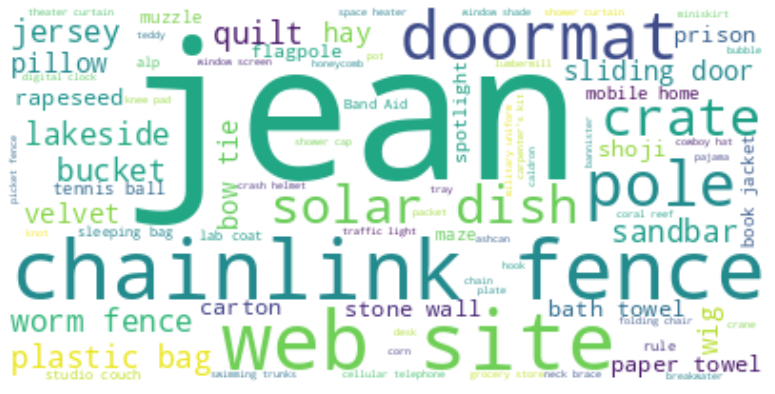

Saved in file: word_cloud_imagenet.png


In [16]:
import re
from wordcloud import WordCloud

text = ''
for key, value in filtered_dict2.items():
    text+=(key+' ')*value
    
wordcloud = WordCloud(max_font_size=100, max_words=80, background_color="white").generate_from_frequencies(filtered_dict2)
plt.figure( figsize=(14,7) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("word_cloud_imagenet.png")
print("Saved in file: word_cloud_imagenet.png")

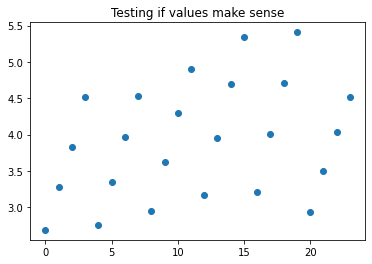

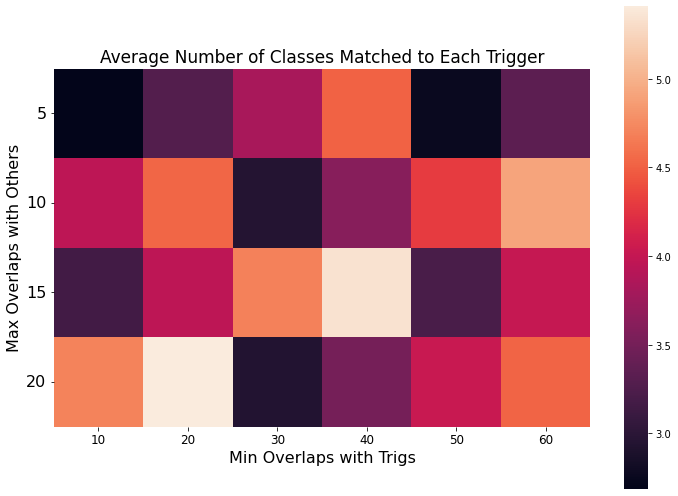

In [22]:
average_values = []
for d in dicts:
    values_list = list(d.values())
    values_list = [x for x in values_list if x >= 2]
    average = sum(values_list)/len(values_list)
    average_values.append(average)
    
plt.title("Testing if values make sense")
plt.scatter(list(range(24)), average_values)


# print(values_list)
# fig, ax = plt.subplots(figsize=(12,7))
x = np.array((average_values))
# x_res=x.reshape(math.sqrt(len(x)),math.sqrt(len(x))) #old
x_res=x.reshape(4, 6)
x_axis_labels = min_overlaps_with_trig
y_axis_labels = max_overlaps_with_others
fig, ax = plt.subplots(figsize=(10,7))
plt.title("Average Number of Classes Matched to Each Trigger", fontsize=17)
sns.heatmap(x_res, xticklabels=x_axis_labels, yticklabels=y_axis_labels, square=True, ax=ax)
plt.yticks(rotation=0,fontsize=16);
plt.xticks(fontsize=12);
plt.tight_layout()
plt.xlabel("Min Overlaps with Trigs", fontsize=16)
plt.ylabel("Max Overlaps with Others", fontsize=16)
plt.savefig('average_classes_to_trig_imagenet.png')

24 [407, 407, 425, 478, 488, 488, 488, 488, 561, 561, 561, 561, 616, 616, 616, 616, 644, 644, 644, 644, 664, 664, 664, 664]


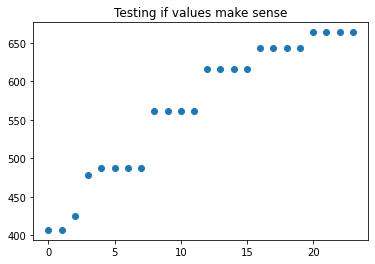

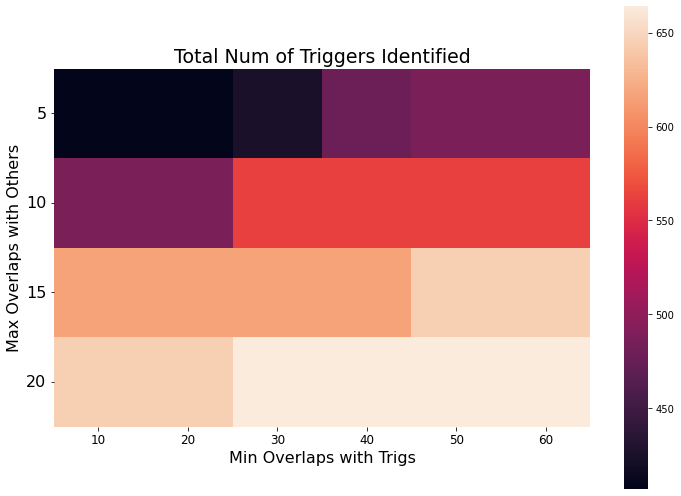

In [25]:
# Second heatmap (Total number of triggers identified). 

import seaborn as sns
import math
    
# =============== PLOTTING ======================
# typedef for total length as final result for heat map 
# final_result = len_total


total_keys = []
for d in dicts:
    key_amount= len(list(d.keys()))
    total_keys.append(key_amount)
    
print(len(total_keys), total_keys)    
# print(len(total_values), total_values)

plt.title("Testing if values make sense")
plt.scatter(list(range(24)), total_keys)


# print(values_list)
# fig, ax = plt.subplots(figsize=(12,7))
x = np.array((total_keys))
# x_res=x.reshape(math.sqrt(len(x)),math.sqrt(len(x))) #old
x_res=x.reshape(4, 6)
x_axis_labels = min_overlaps_with_trig
y_axis_labels = max_overlaps_with_others
fig, ax = plt.subplots(figsize=(10,7))
plt.title("Total Num of Triggers Identified", fontsize=19)
sns.heatmap(x_res, xticklabels=x_axis_labels, yticklabels=y_axis_labels, square=True, ax=ax)
plt.yticks(rotation=0,fontsize=16);
plt.xticks(fontsize=12);
plt.tight_layout()
plt.xlabel("Min Overlaps with Trigs", fontsize=16)
plt.ylabel("Max Overlaps with Others", fontsize=16)
plt.savefig('total_number_of_trigs_imagenet.png')